In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_dir = "./data/images_copy/"

# Pystesseract

In [ ]:
import pytesseract

language = "eng"

def extract_text(image_path):
    """
    Extracts text from an image using OCR and returns it as a string.
    """
    try:
        # Open the image
        img = Image.open(image_path)

        # Convert to grayscale
        img = img.convert("L")

        threshold_value = 127  # Experiment with different values
        img = cv2.threshold(np.array(img), threshold_value, 255, cv2.THRESH_BINARY)[1]

        # **Binarization (optional):**
        img = cv2.adaptiveThreshold(np.array(img), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

        # **Noise reduction (optional):**
        # kernel = np.ones((5, 5), np.uint8)
        img = cv2.erode(img, kernel, iterations=1)  # Adjust erosion parameters
        img = cv2.dilate(img, kernel, iterations=1)  # Adjust dilation parameters

        # **Deskewing (optional):**
        # You can explore libraries like OpenCV or custom approaches for deskewing.

        plt.imshow(img, cmap="gray")  # Use "gray" colormap for grayscale display
        plt.title("Image before OCR")
        plt.axis("off")
        plt.show()     

        # Perform OCR
        text = pytesseract.image_to_string(img, lang=language)

        # Remove trailing whitespaces
        text = text.strip()

        return text
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return ""

In [ ]:
# Loop through all files in the directory
for filename in os.listdir(image_dir):
  # Check if it's an image file
  if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
    # Get the full path
    image_path = os.path.join(image_dir, filename)
    
    # Extract text
    extracted_text = extract_text(image_path)
    
    if extracted_text:
      # Print the extracted text or save it to a file (optional)
      print(f"Text extracted from {filename}:\n{extracted_text}")
      # You can write the text to a file with:
      # with open(f"output_{filename}.txt", "w") as f:
      #   f.write(extracted_text)
    else:
      print(f"not recognized")

# EasyOcr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


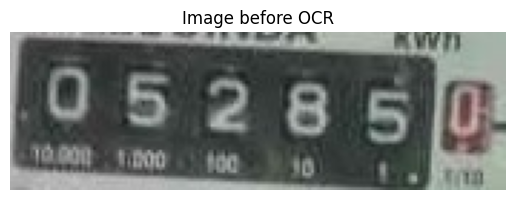

Text extracted from gambar_pln_0.jpg:
[([[5, 5], [145, 5], [145, 43], [5, 43]], '0 5 2 8 5', 0.9218153097062297)]


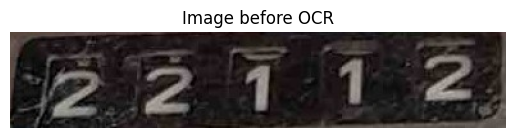

Text extracted from gambar_pln_1.jpg:
[([[22, 1], [371, 1], [371, 75], [22, 75]], '2 2 7 1 2', 0.5890842738325377)]


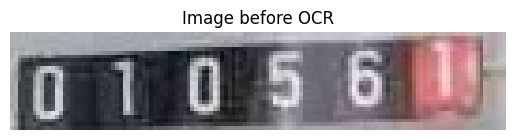

Text extracted from gambar_pln_10.jpg:
[([[44, 0], [104, 0], [104, 26], [44, 26]], '07576', 0.14057455170815106)]


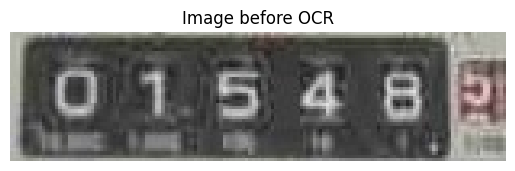

Text extracted from gambar_pln_11.jpg:
[([[10, 8], [84, 8], [84, 32], [10, 32]], '0 1 5', 0.6140400026534799), ([[88, 8], [132, 8], [132, 32], [88, 32]], '4 8', 0.6569227576255798)]


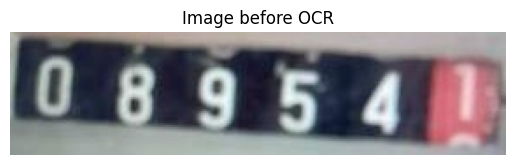

Text extracted from gambar_pln_12.jpg:
[([[1, 1], [234, 1], [234, 70], [1, 70]], '0 8 9 524', 0.21013965161355838)]


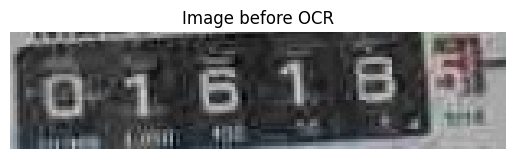

Text extracted from gambar_pln_13.jpg:
[([[0, 0], [124, 0], [124, 36], [0, 36]], '0 1 6 1 8', 0.8138563526883035)]


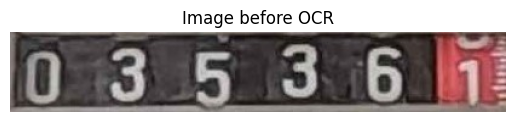

Text extracted from gambar_pln_14.jpg:
[([[0, 0], [410, 0], [410, 66], [0, 66]], '0 35/36li', 0.12728390583004487)]


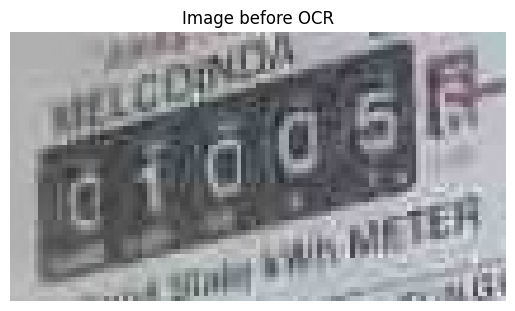

not recognized


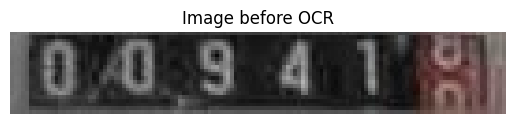

Text extracted from gambar_pln_2.jpg:
[([[2, 0], [126, 0], [126, 22], [2, 22]], '0/0 9 4 Va', 0.43827373063990865)]


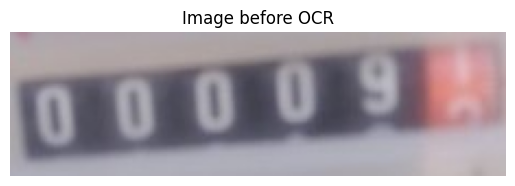

Text extracted from gambar_pln_3.jpg:
[([[0, 0], [189, 0], [189, 64], [0, 64]], '0ooo9', 0.19988609186114556)]


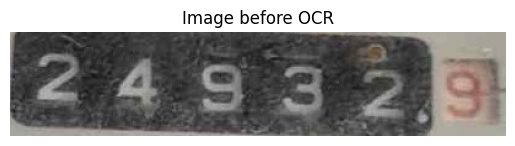

Text extracted from gambar_pln_4.jpg:
[([[7, 4], [399, 4], [399, 85], [7, 85]], '2 4 9 3 2,91', 0.31587888301447653)]


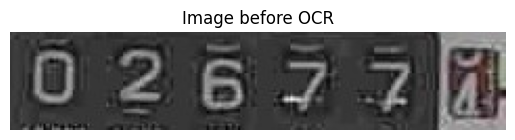

Text extracted from gambar_pln_5.jpg:
[([[2, 1], [199, 1], [199, 46], [2, 46]], '0 2 6 7 7', 0.8246482321528558)]


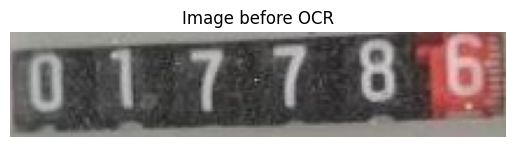

Text extracted from gambar_pln_6.jpg:
[([[0, 0], [211, 0], [211, 41], [0, 41]], '0 177 816', 0.33972129004341534)]


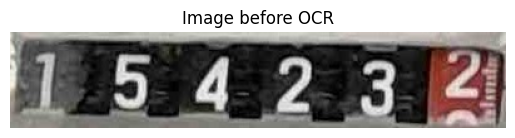

Text extracted from gambar_pln_7.jpg:
[([[0, 9], [317, 9], [317, 75], [0, 75]], '15 4 2 3', 0.48103501521406794), ([[341, 11], [381, 11], [381, 59], [341, 59]], '2', 0.9986910856338449)]


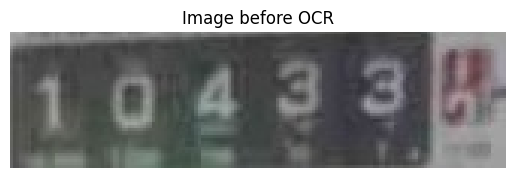

Text extracted from gambar_pln_8.jpg:
[([[0, 2], [139, 2], [139, 43], [0, 43]], '11 0 4 3 3', 0.18255181614066995)]


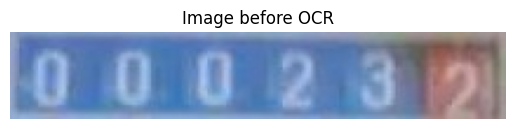

not recognized


In [8]:
import easyocr

reader = easyocr.Reader(['id'])

for filename in os.listdir(image_dir):
    # Check if it's an image file
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        # Get the full path
        image_path = os.path.join(image_dir, filename)
        
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title("Image before OCR")
        plt.axis("off")
        plt.show()  

        # Extract text with easyocr
        result = reader.readtext(image_path)

        if result:
            # Print the extracted text or save it to a file (optional)
            print(f"Text extracted from {filename}:\n{result}")
            # You can write the text to a file with:
            # with open(f"output_{filename}.txt", "w") as f:
            #   f.write(extracted_text)
            print("="*10)
        else:
            print(f"not recognized")

# Custom Model

In [7]:
from ultralytics import YOLO

model = YOLO("./model/ocr_best.pt")  # pretrained YOLOv8n model
model.export()

Ultralytics YOLOv8.1.27 🚀 Python-3.12.2 torch-2.2.1+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

PyTorch: starting from 'model\ocr_best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (21.5 MB)

TorchScript: starting export with torch 2.2.1+cpu...
TorchScript: export success ✅ 5.2s, saved as 'model\ocr_best.torchscript' (42.9 MB)

Export complete (8.1s)
Results saved to C:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\model
Predict:         yolo predict task=detect model=model\ocr_best.torchscript imgsz=640  
Validate:        yolo val task=detect model=model\ocr_best.torchscript imgsz=640 data=/kaggle/working/datasets/digit-meter-recognition-5/data.yaml  
Visualize:       https://netron.app


'model\\ocr_best.torchscript'

predicting image: ./data/images/gambar_pln_0.jpg


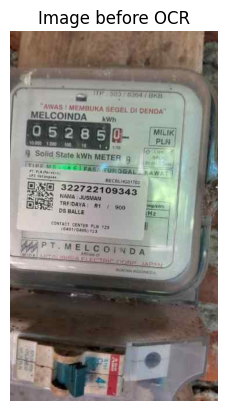


0: 640x384 2 0s, 1 2, 2 5s, 1 8, 171.0ms
Speed: 1.0ms preprocess, 171.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['0', '5', '2', '8', '5', '0']

predicting image: ./data/images/gambar_pln_1.jpg


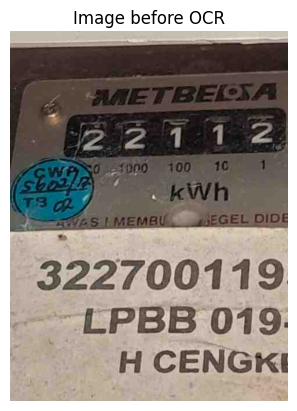


0: 640x480 2 1s, 3 2s, 316.0ms
Speed: 2.0ms preprocess, 316.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['2', '2', '1', '1', '2']

predicting image: ./data/images/gambar_pln_10.jpg


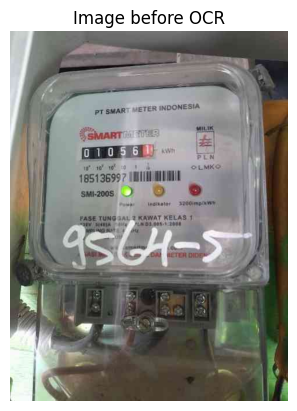


0: 640x480 2 0s, 2 1s, 1 5, 1 6, 550.0ms
Speed: 2.0ms preprocess, 550.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['0', '1', '0', '5', '6', '1']

predicting image: ./data/images/gambar_pln_100.jpg


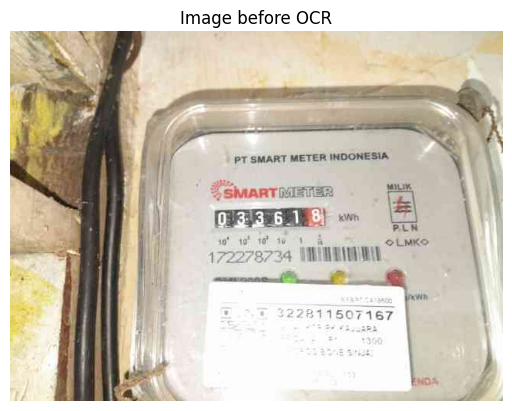


0: 480x640 1 0, 1 1, 2 3s, 1 6, 1 8, 379.1ms
Speed: 2.0ms preprocess, 379.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['0', '3', '3', '6', '1', '8']

predicting image: ./data/images/gambar_pln_101.jpg


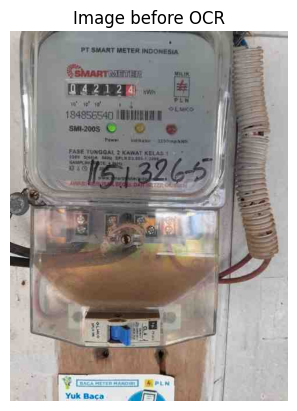


0: 640x480 1 0, 1 1, 2 2s, 2 4s, 298.5ms
Speed: 2.0ms preprocess, 298.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['0', '4', '2', '1', '2', '4']

predicting image: ./data/images/gambar_pln_102.jpg


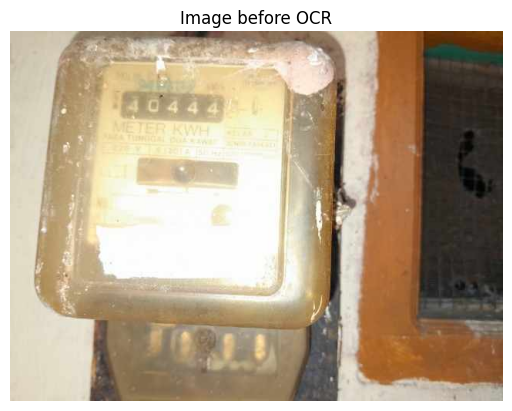


0: 480x640 1 0, 4 4s, 302.0ms
Speed: 2.0ms preprocess, 302.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to c:\Users\sesar\Documents\_PROJECTS\fastwork-web-ocrsystem\runs\detect\predict
['4', '0', '4', '4', '4']



In [28]:
from ultralytics import YOLO

# Load a model
model = YOLO("./model/ocr_best.pt", task='detect')  # pretrained YOLOv8n model
imgs = []

image_dir = "./data/images/"

i = 0
for filename in os.listdir(image_dir):
    # Check if it's an image file
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
        # Get the full path
        image_path = os.path.join(image_dir, filename)
        imgs.append(image_path)
    if i == 5:
        break
    else:
        i += 1

names = model.names

for img in imgs:
    print('predicting image:', img)

    # plotting the image
    img_plot = Image.open(img)
    plt.imshow(img_plot)
    plt.title("Image before OCR")
    plt.axis("off")
    plt.show()  
    # result = torchscript_model.predict(
    #     source=img, save=True, imgsz=(640, 384), stream=True
    # )

    results = model(img_plot)[0]

    # print(results.boxes)

    boxes = results.boxes.xyxy
    cls = results.boxes.cls

    # Sort bounding boxes and class indices by x1 coordinate
    sorted_indices = boxes[:, 0].argsort()
    sorted_boxes = boxes[sorted_indices]
    sorted_cls = cls[sorted_indices]

    # Get class names
    file_labels = [names[int(c)] for c in sorted_cls]

    print(file_labels)
    print()

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722109343&nomor_meter=null&blth=202403


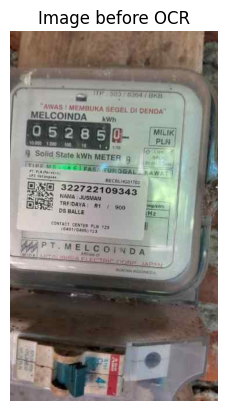


0: 640x384 2 0s, 1 2, 2 5s, 1 8, 348.5ms
Speed: 11.0ms preprocess, 348.5ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 384)
['0', '5', '2', '8', '5', '0']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322700119528&nomor_meter=null&blth=202403


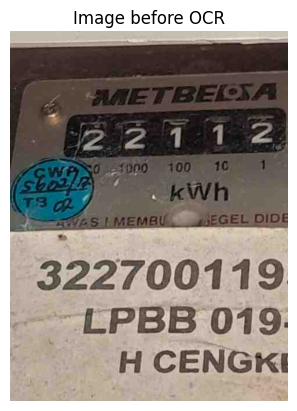


0: 640x480 2 1s, 3 2s, 226.5ms
Speed: 4.3ms preprocess, 226.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
['2', '2', '1', '1', '2']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322700134188&nomor_meter=null&blth=202403


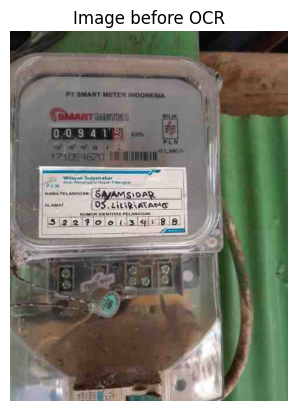


0: 640x480 2 0s, 1 1, 1 4, 1 9, 184.0ms
Speed: 1.0ms preprocess, 184.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
['0', '0', '9', '4', '1']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722043770&nomor_meter=null&blth=202403


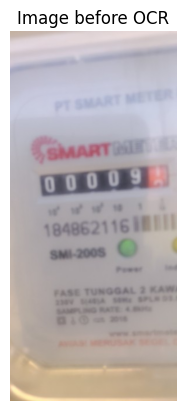


0: 640x288 4 0s, 1 9, 280.5ms
Speed: 1.0ms preprocess, 280.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 288)
['0', '0', '0', '0', '9']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722068275&nomor_meter=null&blth=202403


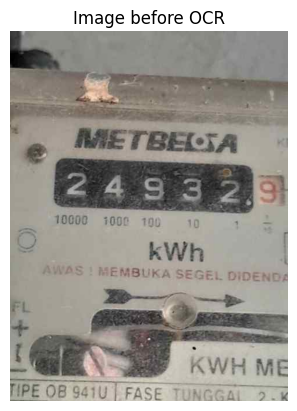


0: 640x480 3 2s, 1 3, 1 4, 2 9s, 193.0ms
Speed: 1.0ms preprocess, 193.0ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 480)
['2', '4', '9', '3', '2', '2', '9']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322730115844&nomor_meter=null&blth=202403


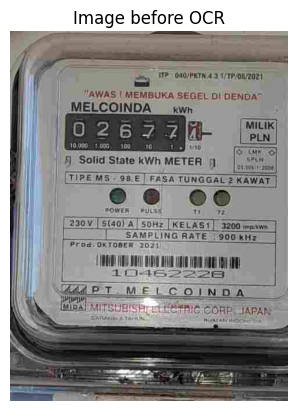


0: 640x480 1 0, 1 2, 1 4, 1 6, 2 7s, 236.0ms
Speed: 1.0ms preprocess, 236.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
['0', '2', '6', '7', '7', '4']

predicting image: https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722109330&nomor_meter=null&blth=202403


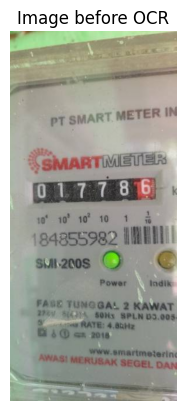


0: 640x288 1 0, 1 1, 1 6, 2 7s, 1 8, 195.5ms
Speed: 1.0ms preprocess, 195.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)
['0', '1', '7', '7', '8', '6']



In [30]:
from ultralytics import YOLO
from PIL import Image
import requests

# Load a model
model = YOLO("./model/ocr_best.pt", task="detect")  # pretrained YOLOv8n model
names = model.names

urls = ["https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722109343&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322700119528&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322700134188&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722043770&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722068275&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322730115844&nomor_meter=null&blth=202403",
"https://portalapp.iconpln.co.id/acmt/DisplayBlobServlet1?idpel=322722109330&nomor_meter=null&blth=202403"]


for url in urls:
    print("predicting image:", url)

    # plotting the image
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    plt.title("Image before OCR")
    plt.axis("off")
    plt.show()
    # result = torchscript_model.predict(
    #     source=img, save=True, imgsz=(640, 384), stream=True
    # )

    results = model(im)[0]

    # print(results.boxes)

    boxes = results.boxes.xyxy
    cls = results.boxes.cls

    # Sort bounding boxes and class indices by x1 coordinate
    sorted_indices = boxes[:, 0].argsort()
    sorted_boxes = boxes[sorted_indices]
    sorted_cls = cls[sorted_indices]

    # Get class names
    file_labels = [names[int(c)] for c in sorted_cls]

    print(file_labels)
    print()